In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
df = pd.read_csv('data/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [3]:
df.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,0,0,0,0,0,2273000


In [4]:
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [5]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [6]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

In [7]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0,2,1,...,23533,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,24514,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,48551,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,53666,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,47835,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000


# Analisis temporales
 La idea de este notbook es analizar todos los datos del dataframe de acuerdo a las fechas y ver qué cosas interesantes podemos observar, más alla de estudiar el comportamiento de los distintos features a través del tiempo.

In [8]:
df.fecha.min()

Timestamp('2012-01-01 00:00:00')

In [9]:
df.fecha.max()

Timestamp('2016-12-31 00:00:00')

## Comienzo analizando la variación de la cantidad de publicaciones a través del tiempo

Para esto lo primero que hago es crear nuevas columnas según el día, mes y año.

In [10]:
df.fecha.head()

0   2015-08-23
1   2013-06-28
2   2015-10-17
3   2012-03-09
4   2016-06-07
Name: fecha, dtype: datetime64[ns]

In [11]:
#Extraigo el año
df['anio'] = df.fecha.dt.year
df.anio.head()

0    2015
1    2013
2    2015
3    2012
4    2016
Name: anio, dtype: int64

In [12]:
#Extraigo el mes
df['mes'] = df.fecha.dt.month
df.mes.head()

0     8
1     6
2    10
3     3
4     6
Name: mes, dtype: int64

In [13]:
#Extraigo el día
df['dia'] = df.fecha.dt.day
df.dia.head()

0    23
1    28
2    17
3     9
4     7
Name: dia, dtype: int64

Cuento la cantidad de publicaciones realizadas según el año

In [14]:
dataXanio = df[['id', 'anio']].groupby('anio').agg('count').reset_index()
dataXanio.columns = ['año', 'cantidad_publicaciones']
dataXanio

,año,cantidad_publicaciones
0,2012,23534
1,2013,30386
2,2014,40572
3,2015,51470
4,2016,94038


In [15]:
dataXanio.dtypes

año                       int64
cantidad_publicaciones    int64
dtype: object

Text(0.5,0,'Año')

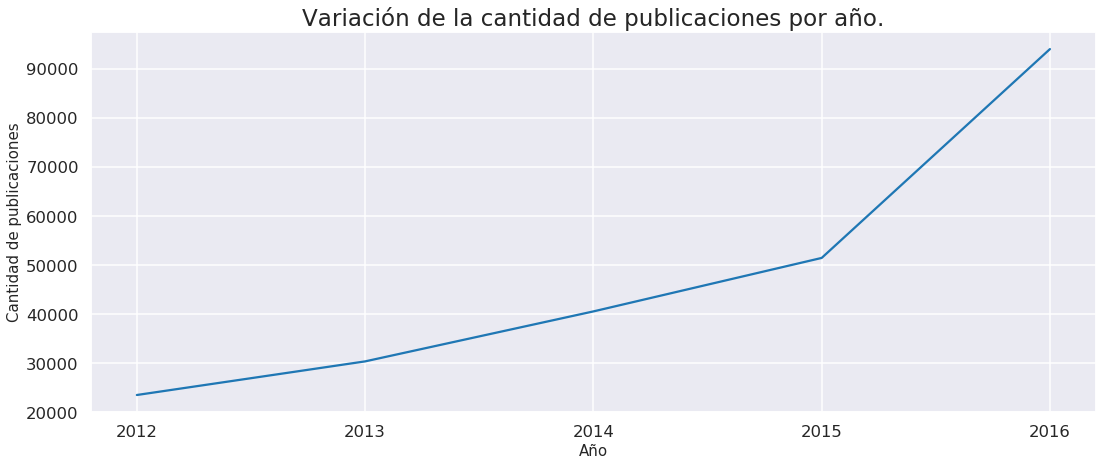

In [16]:
plt.figure(figsize = (18,7))
sns.set_style("darkgrid")
sns.set_context("talk")
pubsXanio = sns.lineplot(data = dataXanio, x = 'año', y = 'cantidad_publicaciones', palette = 'Set1')
pubsXanio.set_xticks([2012, 2013, 2014, 2015, 2016])
pubsXanio.set_title('Variación de la cantidad de publicaciones por año.', fontsize =  23)
pubsXanio.set_ylabel('Cantidad de publicaciones', fontsize = 15)
pubsXanio.set_xlabel('Año', fontsize = 15)

En el gráfico se aprecia que la cantidad de publicaciones siempre estuvo en alza desde el año 2012, que es donde comienzan nuestros datos, pero se observa, además, como a partir del 2015 la cantidad de publicaciones aumentó considerablemente y continuó en alza a partir de ahí.

## Veo de manera más detallada cómo varían las publicaciones según los meses del año

In [17]:
dataXmes = df[['id', 'anio', 'mes']].groupby(['anio', 'mes']).agg('count')
dataXmes = dataXmes.unstack(0)
dataXmes.columns = ['2012', '2013', '2014', '2015', '2016']

In [18]:
dataXmes.head()

,2012,2013,2014,2015,2016
mes,,,,,
1,1528,1993,2403,4310,5775
2,1327,1401,2534,3869,4592
3,1103,1734,2916,3957,5022
4,1434,1829,2780,3783,6640
5,1857,2000,3071,3696,5438


In [19]:
dataXmes = dataXmes.reset_index()
dataXmes.head()

,mes,2012,2013,2014,2015,2016
0,1,1528,1993,2403,4310,5775
1,2,1327,1401,2534,3869,4592
2,3,1103,1734,2916,3957,5022
3,4,1434,1829,2780,3783,6640
4,5,1857,2000,3071,3696,5438


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,0.95,'Variación de la cantidad de publicaciones según el mes para cada año.')

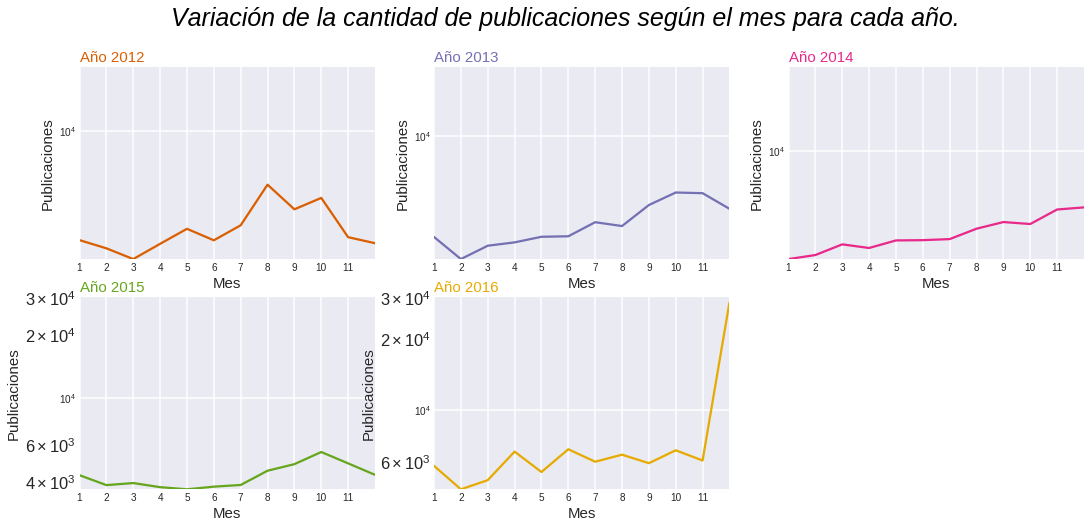

In [20]:
plt.figure(figsize = (18,12))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

for num, column in enumerate(dataXmes.drop('mes', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas de cada año
    plt.semilogy(dataXmes['mes'], dataXmes[column], marker='', color=palette(num))
    #Todos los plots tienen los mismos límites
    plt.yticks(fontsize = 10)
    plt.xticks(list(range(1,12)), fontsize = 10)
    plt.xlim(1,12)
    plt.ylim(0,30000)
    # Título para cada plot
    plt.title("Año "+column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Mes', fontsize = 15)
    plt.ylabel('Publicaciones', fontsize = 15)
    
plt.suptitle("Variación de la cantidad de publicaciones según el mes para cada año.", fontsize = 25, color='black', style='italic', y=0.95)
 

Algo muy curioso en este gráfico es el crecimiento en aumento de publicaciones que se registra a partir del mes de noviembre del año 2016, es algo que llama la atención así que haremos más análisis sobre esto más adelante.
Además es el único año que cierra al alza en las publicaciones, pues se observa que la tendencia en la mayoria de los años anteriores era la disminución de las publicaciones en los ultimos meses

## Pruebo una alternativa diferente

Text(0.5,1.02,'Variación de la cantidad de publicaciones según el mes para cada año.')

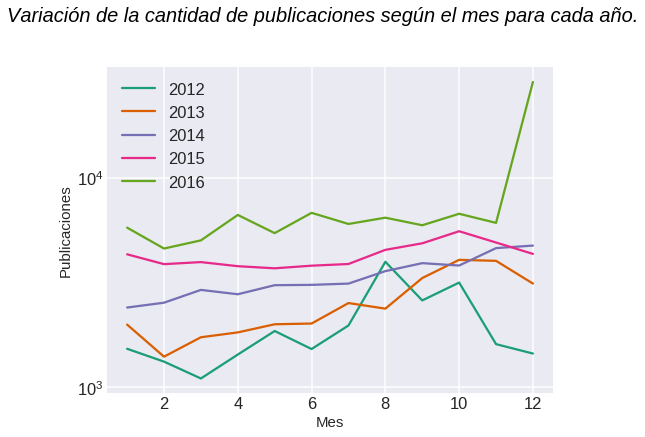

In [21]:
plt.figure(figsize = (8,6))
for i, j in  enumerate(dataXmes.iloc[:,1:].columns):
    plt.semilogy(dataXmes['mes'], dataXmes[j], marker='', color=palette(i))
plt.legend()
plt.xlabel('Mes', fontsize = 15)
plt.ylabel('Publicaciones', fontsize = 15)
plt.suptitle("Variación de la cantidad de publicaciones según el mes para cada año.", fontsize = 20, fontweight=0, color='black', style='italic', y=1.02)

## Veo con un poco más de detalle el comportamiento de las publicaciones por día para el mes de noviembre del 2016

In [22]:
data_nov_2016 = df.loc[(df.mes == 11) & (df.anio == 2016), ['id', 'dia']].groupby('dia').agg('count').reset_index()
data_nov_2016.head()

,dia,id
0,1,254
1,2,131
2,3,129
3,4,278
4,5,177


Text(0,0.5,'Publicaciones')

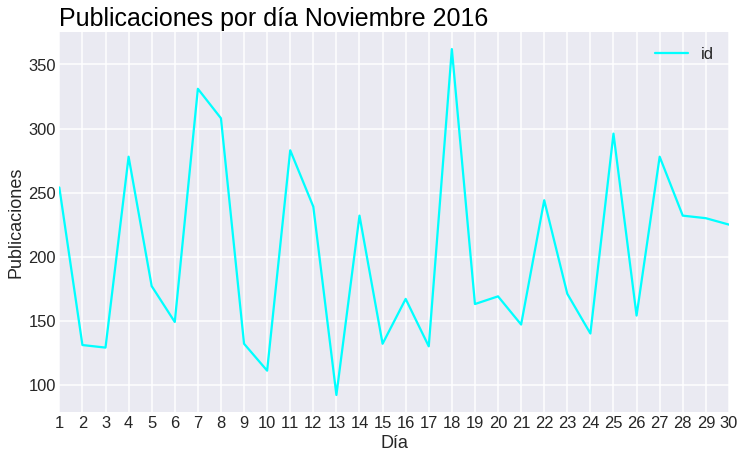

In [23]:
data_nov_2016.plot(x = 'dia', y = 'id', figsize = (12,7), xticks = list(range(1,31)), color = 'cyan')
plt.title("Publicaciones por día Noviembre 2016", loc='left', fontsize=25, fontweight=0, color='black')
plt.xlabel('Día')
plt.ylabel('Publicaciones')

Este gráfico realmente no aporta nada interesante ni que nos pueda dar un indicio para responder acerca del comportamiento de la variación de publicaciones, así que no lo tomaremos en cuenta.

## Veamos ahora cómo varía el precio de las propiedades a lo largo del tiempo

In [24]:
df.precio.count()

240000

In [25]:
precio_por_anio = df[['anio', 'precio']].groupby('anio').agg('mean').reset_index()
precio_por_anio

,anio,precio
0,2012,2.032518e+06
1,2013,2.125061e+06
2,2014,2.364595e+06
3,2015,2.634570e+06
4,2016,2.801614e+06


Text(0,0.5,'Precio')

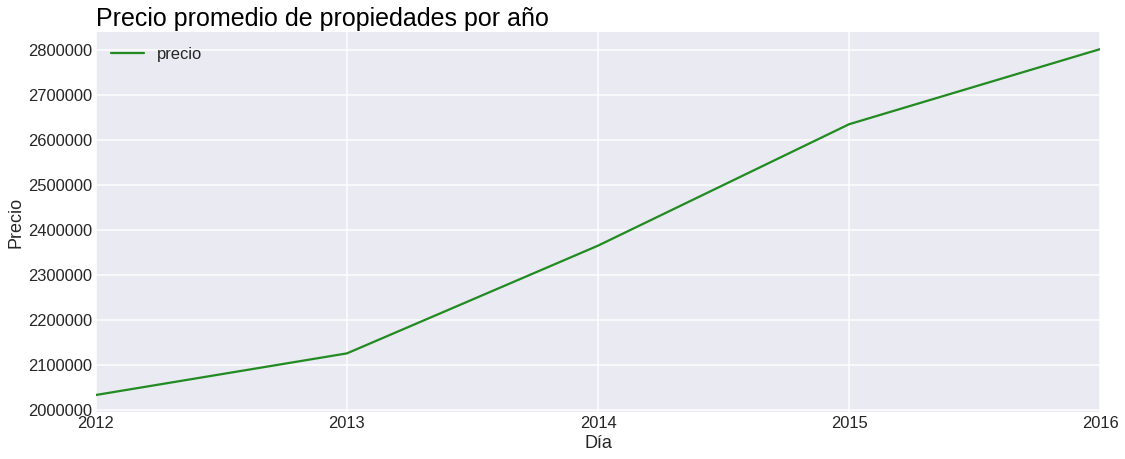

In [26]:
precio_por_anio.plot(x = 'anio', y = 'precio', figsize = (18,7), color = 'forestgreen', xticks = [2012,2013,2014,2015,2016])
plt.title("Precio promedio de propiedades por año", loc='left', fontsize=25, color='black')
plt.xlabel('Día', fontsize = 18)
plt.ylabel('Precio', fontsize = 18)

Vemos que los precios también van en aumento a los largo de los años. Veamoslo más detallado, a ver si podemos encontrar algo mas que podamos relacionar a la cantidad de publicaciones.

## Veo como varian los precios por mes según el año en que se encuentra

In [27]:
precios_mes_anio = df[['anio', 'mes', 'precio']].groupby(['anio', 'mes']).agg('mean').unstack(0).reset_index()
precios_mes_anio.columns = ['mes', 'precio2012', 'precio2013', 'precio2014', 'precio2015', 'precio2016']
precios_mes_anio

,mes,precio2012,precio2013,precio2014,precio2015,precio2016
0,1,1.910287e+06,2.032821e+06,2.194887e+06,2.399791e+06,2.688370e+06
1,2,1.817815e+06,2.158046e+06,2.327649e+06,2.367704e+06,2.695540e+06
2,3,1.966355e+06,2.092788e+06,2.268509e+06,2.602794e+06,2.807389e+06
3,4,2.167271e+06,2.164533e+06,2.360991e+06,2.520666e+06,2.827183e+06
4,5,1.899124e+06,2.119536e+06,2.312620e+06,2.643570e+06,2.726720e+06
5,6,1.930387e+06,2.058968e+06,2.357717e+06,2.734104e+06,2.744906e+06
6,7,1.827299e+06,2.221331e+06,2.358130e+06,2.779177e+06,2.882330e+06
7,8,2.116829e+06,2.197108e+06,2.345646e+06,2.654494e+06,2.880278e+06
8,9,2.092780e+06,2.112627e+06,2.430109e+06,2.778324e+06,2.918304e+06
9,10,2.228157e+06,2.178859e+06,2.262678e+06,2.712010e+06,2.825196e+06


Text(0.5,0.95,'Variación del precio promedio de las propiedades según el mes para cada año.')

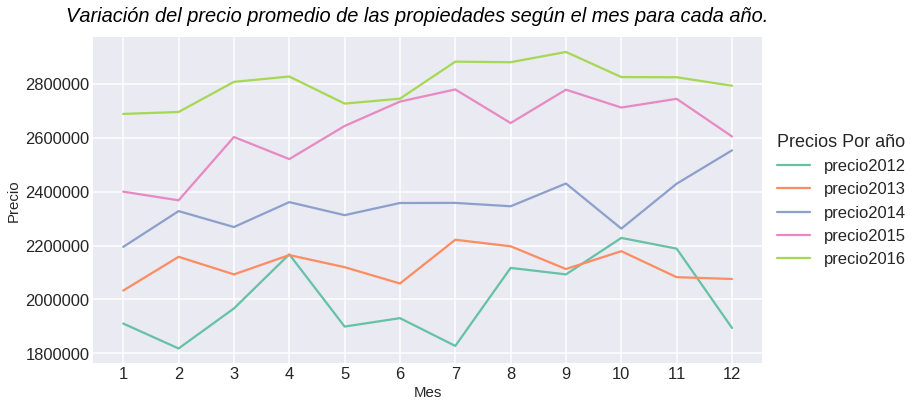

In [88]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set2')
for i, j in  enumerate(precios_mes_anio.iloc[:,1:].columns):
    plt.plot(precios_mes_anio['mes'], precios_mes_anio[j], marker='', color=palette(i))
plt.xticks(list(range(1,13)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Precios Por año')
plt.xlabel('Mes', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.suptitle("Variación del precio promedio de las propiedades según el mes para cada año.", fontsize = 20, color='black', style='italic', y = 0.95)

## ¿Cómo varía la oferta de propiedades según su tipo a lo largo del tiempo? ¿Tendrá esto algo que ver con el comportamiento de la variación de precios?

In [29]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'anio', 'mes', 'dia'],
      dtype='object')

Veamos cuales son los tipos de propiedades más populares dependiendo del año en el que se publican


In [30]:
cant_publicaciones_tipo = df[['anio', 'tipodepropiedad', 'id']].groupby(['anio', 'tipodepropiedad']).agg('count').unstack(0)
cant_publicaciones_tipo.columns = ['2012', '2013', '2014', '2015', '2016']
#cant_publicaciones_tipo = cant_publicaciones_tipo.fillna(0).loc[cant_publicaciones_tipo.tipodepropiedad != 0]
#filtro los tipos que tengan al menos 100 publicaciones
cant_publicaciones_tipo = cant_publicaciones_tipo.loc[(cant_publicaciones_tipo['2012'] >= 100) & (cant_publicaciones_tipo['2013'] >= 100) & (cant_publicaciones_tipo['2014'] >= 100) & (cant_publicaciones_tipo['2015'] >= 100) & (cant_publicaciones_tipo['2016'] >= 100), :]
cant_publicaciones_tipo = cant_publicaciones_tipo.T
cant_publicaciones_tipo

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Edificio,Local Comercial,Oficina comercial,Terreno,Terreno comercial
2012,5071.0,139.0,13728.0,2835.0,172.0,109.0,163.0,951.0,113.0
2013,6716.0,158.0,19366.0,1960.0,193.0,328.0,209.0,1108.0,100.0
2014,9698.0,236.0,24299.0,3042.0,244.0,525.0,309.0,1540.0,289.0
2015,12780.0,327.0,29800.0,4095.0,317.0,718.0,358.0,2133.0,434.0
2016,23076.0,546.0,54524.0,7365.0,470.0,1375.0,702.0,4213.0,390.0


In [31]:
cant_publicaciones_tipo.columns

CategoricalIndex(['Apartamento', 'Bodega comercial', 'Casa',
                  'Casa en condominio', 'Edificio', 'Local Comercial',
                  'Oficina comercial', 'Terreno', 'Terreno comercial'],
                 categories=[0, 'Apartamento', 'Bodega comercial', 'Casa', 'Casa en condominio', 'Casa uso de suelo', 'Departamento Compartido', 'Duplex', ...], ordered=False, name='tipodepropiedad', dtype='category')

Text(0.5,0.95,'Publicaciones por año para los tipos de propiedades más populares')

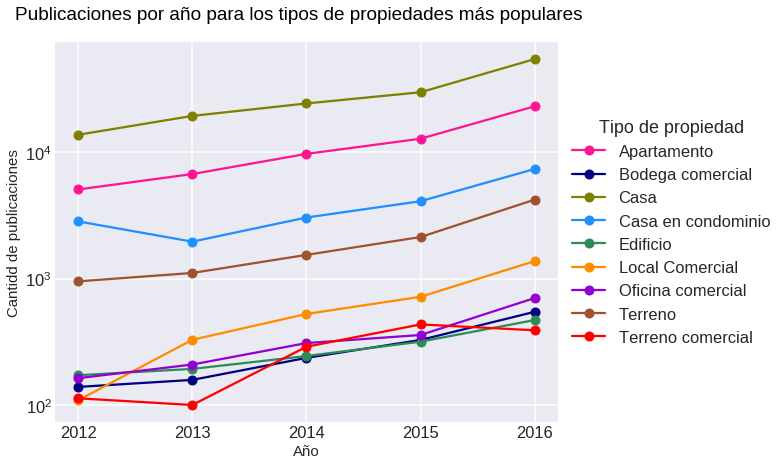

In [32]:
plt.figure(figsize = (9,7))
color = ['deeppink', 'navy', 'olive', 'dodgerblue', 'seagreen', 'darkorange', 'darkviolet', 'sienna', 'red', 'dimgray']
for i, j in  enumerate(cant_publicaciones_tipo.columns):
    plt.semilogy(cant_publicaciones_tipo.index, cant_publicaciones_tipo[j], color = color[i], marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Tipo de propiedad')
#plt.yticks(list(range(0,55000)))
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Cantidd de publicaciones', fontsize = 15)
plt.suptitle("Publicaciones por año para los tipos de propiedades más populares", fontsize = 19, color='black', y = 0.95)

Ahora veamos qué sucede con los precios de las propiedades según su tipo

In [33]:
#Utilizo los mismos tipos que utilice en el gráfico anterior
precio_por_tipo = df.loc[df.tipodepropiedad.isin(cant_publicaciones_tipo.columns), ['anio', 'tipodepropiedad', 'precio']].groupby(['anio', 'tipodepropiedad']).agg('mean').dropna()
precio_por_tipo = precio_por_tipo.unstack(1)
precio_por_tipo.columns = cant_publicaciones_tipo.columns
precio_por_tipo

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Edificio,Local Comercial,Oficina comercial,Terreno,Terreno comercial
anio,,,,,,,,,
2012,1.895032e+06,2.204930e+06,2.011125e+06,2.261724e+06,4.807669e+06,2.247376e+06,2.630736e+06,1.393834e+06,2.331124e+06
2013,2.219235e+06,2.616785e+06,2.026202e+06,2.693680e+06,4.927447e+06,2.060567e+06,2.389210e+06,1.411383e+06,2.078243e+06
2014,2.429907e+06,2.608754e+06,2.287626e+06,2.775549e+06,4.676060e+06,2.272543e+06,2.770284e+06,1.681164e+06,2.458178e+06
2015,2.965421e+06,2.818306e+06,2.475347e+06,2.983437e+06,4.788692e+06,2.336652e+06,3.420798e+06,1.798915e+06,2.112681e+06
2016,3.141786e+06,2.802626e+06,2.634788e+06,3.202797e+06,5.439087e+06,2.497192e+06,3.522474e+06,2.050155e+06,3.023964e+06


Text(0.5,0.95,'Precio promedio por año para los tipos de propiedades más populares')

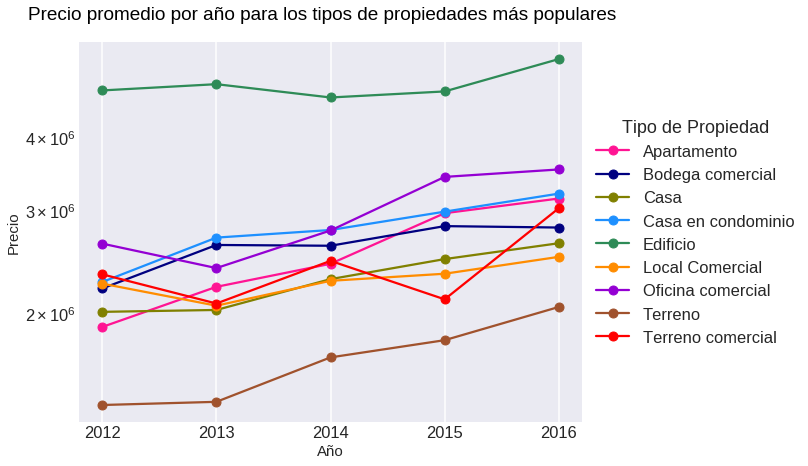

In [34]:
plt.figure(figsize = (9,7))
for i, j in  enumerate(precio_por_tipo.columns):
    plt.semilogy(precio_por_tipo.index, precio_por_tipo[j], color = color[i], marker = 'o')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Tipo de Propiedad')
plt.xticks([2012,2013,2014,2015,2016])
plt.xlabel('Año', fontsize = 15)
plt.ylabel('Precio', fontsize = 15)
plt.suptitle("Precio promedio por año para los tipos de propiedades más populares", fontsize = 19, color='black', y = 0.95)

## ¿Cómo se comportan los metros de las propiedades a través del tiempo?

In [35]:
#Los valores 0 corresponden a valores nulos
df.metroscubiertos.isin([0]).value_counts()

False    222600
True      17400
Name: metroscubiertos, dtype: int64

In [45]:
df_metros = df.loc[:, ['fecha', 'metroscubiertos', 'metrostotales', 'id', 'precio']]
df_metros.head()

,fecha,metroscubiertos,metrostotales,id,precio
0,2015-08-23,80,80,254099,2273000
1,2013-06-28,268,180,53461,3600000
2,2015-10-17,144,166,247984,1200000
3,2012-03-09,63,67,209067,650000
4,2016-06-07,95,95,185997,1150000


In [46]:
#tomo el año de las publicaciones
df_metros['año'] = df_metros.fecha.dt.year
df_metros.head()

,fecha,metroscubiertos,metrostotales,id,precio,año
0,2015-08-23,80,80,254099,2273000,2015
1,2013-06-28,268,180,53461,3600000,2013
2,2015-10-17,144,166,247984,1200000,2015
3,2012-03-09,63,67,209067,650000,2012
4,2016-06-07,95,95,185997,1150000,2016


## Metros cubiertos en el tiempo

In [47]:
df_mtrs_años = df_metros[df.metroscubiertos != 0].groupby(['año', 'metroscubiertos']).agg({'id': 'count'}).unstack(0)
df_mtrs_años.columns = ['2012','2013', '2014', '2015', '2016']
df_mtrs_años = df_mtrs_años.reset_index()
df_mtrs_años.head()

,metroscubiertos,2012,2013,2014,2015,2016
0,15,1.0,6.0,4.0,5.0,14.0
1,16,2.0,NaN,1.0,5.0,10.0
2,17,NaN,2.0,2.0,1.0,3.0
3,18,1.0,1.0,NaN,4.0,7.0
4,19,1.0,NaN,2.0,2.0,5.0


Text(0.5,0.98,'Variación de Metros cubiertos de propiedades para cada año.')

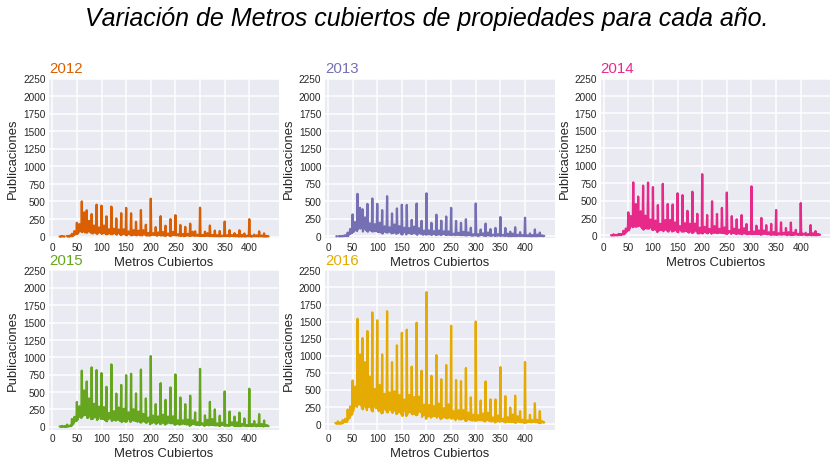

In [48]:
plt.figure(figsize = (14,10))
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

for num, column in enumerate(df_mtrs_años.drop('metroscubiertos', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas de cada año
    plt.plot(df_mtrs_años['metroscubiertos'], df_mtrs_años[column], marker='', color=palette(num))
    #Todos los plots tienen los mismos límites
    plt.yticks(list(range(0,2500, 250)), fontsize = 10)
    plt.xticks(list(range(0,450,50)),fontsize = 10)
    # Título para cada plot
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Metros Cubiertos', fontsize = 13, fontweight=1)
    plt.ylabel('Publicaciones', fontsize = 13, fontweight=1)
    
plt.suptitle("Variación de Metros cubiertos de propiedades para cada año.", fontsize = 25, color='black', style='italic', y=0.98)

## Metros totales en el tiempo

In [49]:
df_mtrs_totales= df_metros[df.metrostotales != 0].groupby(['año', 'metrostotales']).agg({'id': 'count'}).unstack(0)
df_mtrs_totales.columns = ['2012','2013', '2014', '2015', '2016']
df_mtrs_totales = df_mtrs_totales.reset_index()
df_mtrs_totales.head()

,metrostotales,2012,2013,2014,2015,2016
0,15,17.0,5.0,3.0,2.0,5.0
1,16,4.0,4.0,2.0,5.0,4.0
2,17,3.0,5.0,NaN,2.0,3.0
3,18,4.0,3.0,1.0,2.0,4.0
4,19,2.0,2.0,NaN,1.0,3.0


Text(0.5,0.95,'Publicaciones según Metros Totales Vs. Metros Cubiertos para cada Año.')

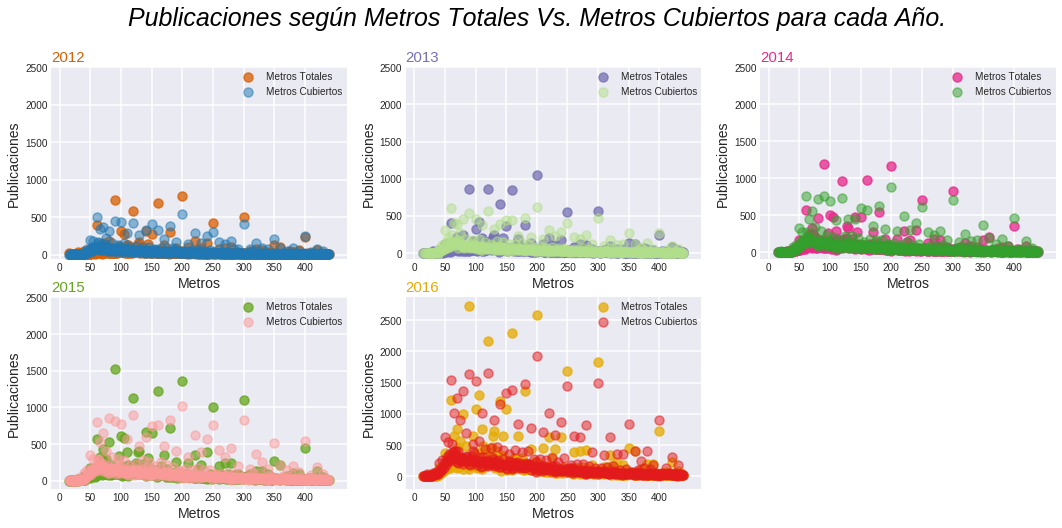

In [65]:
palette1 = plt.get_cmap('Dark2')
palette2 = plt.get_cmap('Paired')

plt.figure(figsize=(18,12))
for num, column in enumerate(df_mtrs_totales.drop('metrostotales', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    # Uso semilog para poder apreciar mejor el comportamiento de las lineas de cada año
    plt.scatter(df_mtrs_totales['metrostotales'], df_mtrs_totales[column], color=palette1(num), alpha = 0.75)
    plt.scatter(df_mtrs_años['metroscubiertos'], df_mtrs_años[column], color=palette2(num), alpha = 0.5)
    #Todos los plots tienen los mismos límites
    plt.yticks(list(range(0,3000, 500)), fontsize = 10)
    plt.xticks(list(range(0,450,50)),fontsize = 10)
    # Título para cada plot
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Metros', fontsize = 14, fontweight=1)
    plt.ylabel('Publicaciones', fontsize = 14, fontweight=1)
    plt.legend(labels = ('Metros Totales', 'Metros Cubiertos'), fontsize = 10, borderaxespad = 0)
    
plt.suptitle("Publicaciones según Metros Totales Vs. Metros Cubiertos para cada Año.", fontsize = 25, color='black', style='italic', y=0.95)

## Veamos qué pasa con los precios respecto a los metros

In [53]:
precios_metrs_cub = df_metros[df.metroscubiertos != 0].groupby(['año', 'metroscubiertos']).agg({'precio': 'mean'}).unstack(0)
precios_metrs_cub.columns = ['2012','2013', '2014', '2015', '2016']
precios_metrs_cub = precios_metrs_cub.reset_index()
precios_metrs_cub.head()

,metroscubiertos,2012,2013,2014,2015,2016
0,15,1450000.0,1.216667e+06,1358822.25,1340000.0,1.940605e+06
1,16,745000.0,NaN,2373000.00,695000.0,1.126146e+06
2,17,NaN,1.064500e+06,967400.00,530000.0,6.602083e+05
3,18,2300000.0,6.000000e+06,NaN,598750.0,2.111000e+06
4,19,570000.0,NaN,1305000.00,1745000.0,5.979600e+05


In [54]:
precios_metrs_tot = df_metros[df.metrostotales != 0].groupby(['año', 'metrostotales']).agg({'precio': 'mean'}).unstack(0)
precios_metrs_tot.columns = ['2012','2013', '2014', '2015', '2016']
precios_metrs_tot = precios_metrs_tot.reset_index()
precios_metrs_tot.head()

,metrostotales,2012,2013,2014,2015,2016
0,15,1.889308e+06,2.384000e+06,3555870.0,2335000.0,4.419500e+06
1,16,2.860000e+06,2.896090e+06,1047500.0,2230000.0,1.416700e+06
2,17,1.866667e+06,1.886000e+06,NaN,1240000.0,1.470667e+06
3,18,2.994675e+06,2.957333e+06,400000.0,422500.0,4.380000e+05
4,19,1.470000e+06,5.605000e+05,NaN,495000.0,6.526000e+05


In [60]:
# Filtro los metros que tengan menos de 10 publicaciones por año
metros_pop_tot = df_mtrs_totales.loc[(df_mtrs_totales['2012'] >= 10) & (df_mtrs_totales['2013'] >= 10) & (df_mtrs_totales['2014'] >= 10) & (df_mtrs_totales['2015'] >= 10) & (df_mtrs_totales['2016'] >= 10), 'metrostotales'].unique()
metros_pop_cub = df_mtrs_totales.loc[(df_mtrs_años['2012'] >= 10) & (df_mtrs_años['2013'] >= 10) & (df_mtrs_años['2014'] >= 10) & (df_mtrs_años['2015'] >= 10) & (df_mtrs_años['2016'] >= 10), 'metrostotales'].unique()

In [75]:
precios_metrs_tot = precios_metrs_tot.loc[precios_metrs_tot.metrostotales.isin(metros_pop_tot)]
precios_metrs_cub = precios_metrs_cub.loc[precios_metrs_cub.metroscubiertos.isin(metros_pop_cub)]

In [76]:
precios_metrs_tot.max()

metrostotales    4.370000e+02
2012             5.204670e+06
2013             5.339379e+06
2014             5.491857e+06
2015             5.659439e+06
2016             5.985012e+06
dtype: float64

In [77]:
precios_metrs_cub.max()

metroscubiertos    4.350000e+02
2012               6.312500e+06
2013               6.053167e+06
2014               6.448777e+06
2015               6.351211e+06
2016               6.734645e+06
dtype: float64

Text(0.5,0.95,'Precios según Metros Totales Vs. Metros Cubiertos para cada Año.')

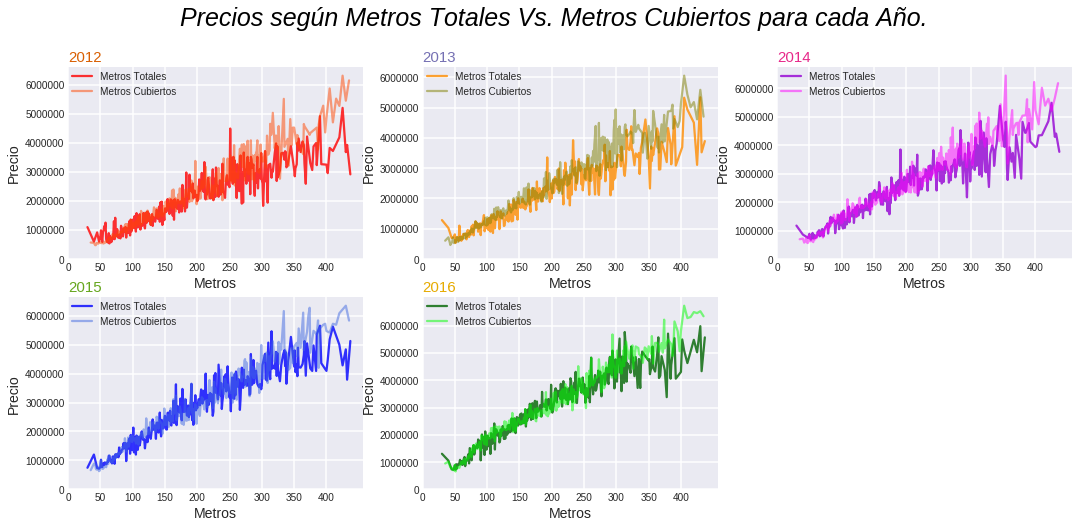

In [87]:
plt.figure(figsize=(18,12))
colores1 = ['red', 'darkorange', 'darkviolet', 'blue', 'darkgreen']
colores2 = ['orangered', 'olive', 'magenta', 'royalblue', 'lime']
for num, column in enumerate(precios_metrs_tot.drop('metrostotales', axis=1)):
    
    num += 1
    plt.subplot(3,3, num)
    
    plt.plot(precios_metrs_tot['metrostotales'], precios_metrs_tot[column], color=colores1[num-1], alpha = 0.8)
    plt.plot(precios_metrs_cub['metroscubiertos'], precios_metrs_cub[column], color=colores2[num-1], alpha = 0.5)
    #Todos los plots tienen los mismos límites
    plt.yticks(list(range(0,7000000, 1000000)), fontsize = 10)
    plt.xticks(list(range(0,450,50)),fontsize = 10)
    # Título para cada plot
    plt.title(column, loc='left', fontsize=15, fontweight=0, color=palette(num))
    plt.xlabel('Metros', fontsize = 14, fontweight=1)
    plt.ylabel('Precio', fontsize = 14, fontweight=1)
    plt.legend(labels = ('Metros Totales', 'Metros Cubiertos'), fontsize = 10, borderaxespad = 0)
    
plt.suptitle("Precios según Metros Totales Vs. Metros Cubiertos para cada Año.", fontsize = 25, color='black', style='italic', y=0.95)

Observamos que los metros totales y cubiertos se comportan de una manera bastante razonable, cuanto menos metros el precio es menor y a medida que los metros aumentan el precio lo hace también.
Las variaciones de precios entre metros cubiertos y metros totales no son demasiado significativas en la mayoría de los casos.
También se observa el aumento de los precios a lo largo del tiempo, aunque no es demasiado evidente en estos gráficos como lo han sido en otros casos.
Por lo que se observa estas variables podrían funcionar muy bien como features a la hora de probar modelos para la predicción de precios, puesto que se comportan de manera similar al precio.